<a href="https://colab.research.google.com/github/blawok/Toxic_Comments_Classification/blob/master/toxic_comments_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Toxic comment classification

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import missingno as msno

%matplotlib inline
import matplotlib.pyplot as plt

from itertools import combinations

In [0]:
train = pd.read_csv('drive/My Drive/Toxic_Comments/train.csv')
test = pd.read_csv('drive/My Drive/Toxic_Comments/test.csv')
test_labels = pd.read_csv('drive/My Drive/Toxic_Comments/test_labels.csv')
test_set = pd.concat([test.reset_index(drop=True), test_labels.iloc[:,1:]], axis=1)
test_set =test_set[test_set.toxic == -1]

# EDA

## How does the data look like?

In [6]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [45]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let's see how the distributions vary by each category:





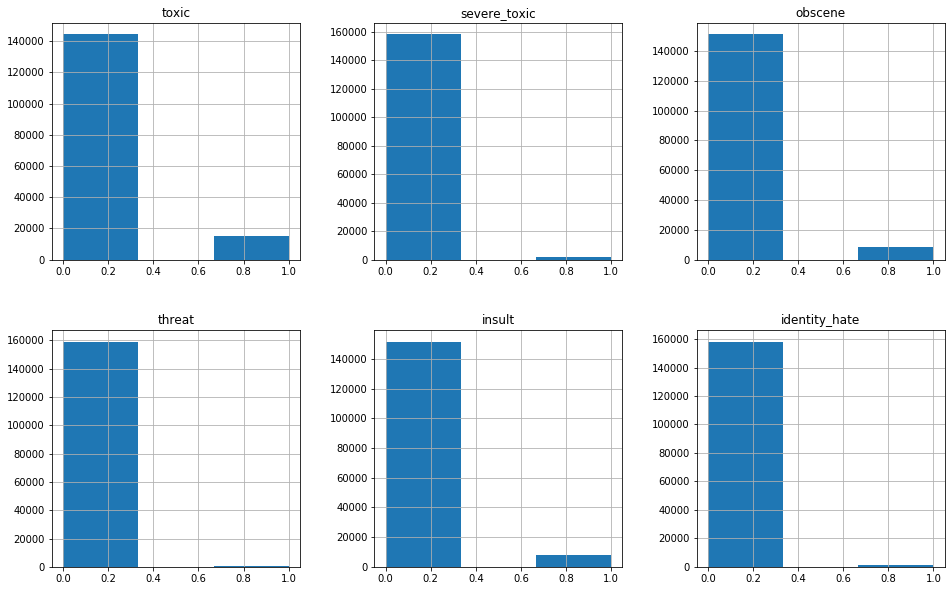

In [65]:
fig, axes = plt.subplots(2,3, figsize=(16, 10))
i = 2
for triaxis in axes:
    for axis in triaxis:
        train.hist(column = train.columns[i], bins = 3, ax=axis)
        i = i+1
plt.show()

Toxic, obscene and insult categories have the most positive (=1) observations. Let see if this is also the issue for test set.

In [70]:
test_set.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000,153164.000000
mean,-0.542530,-0.579895,-0.558193,-0.580913,-0.559916,-0.577642
std,0.572465,0.498408,0.542966,0.496195,0.539594,0.503260
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


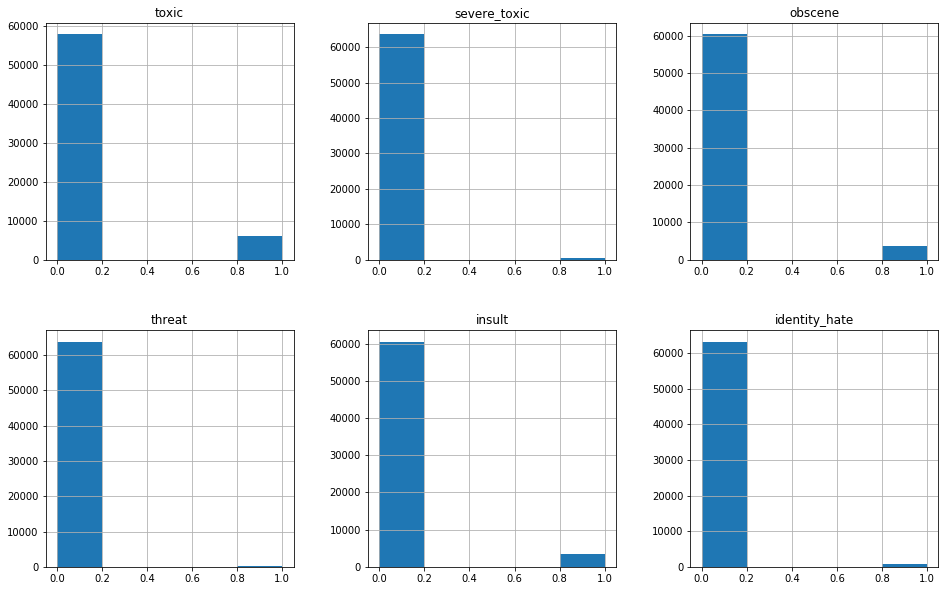

In [79]:
fig, axes = plt.subplots(2,3, figsize=(16, 10))
i = 2
for triaxis in axes:
    for axis in triaxis:
        test_set.hist(column = test_set.columns[i], bins = 5, ax=axis)
        i = i+1
plt.show()

Fortunately, the distribution looks very similar to the training set, so there would not be any problems with imbalanced data between train and test.


Are there any rows with missing data?

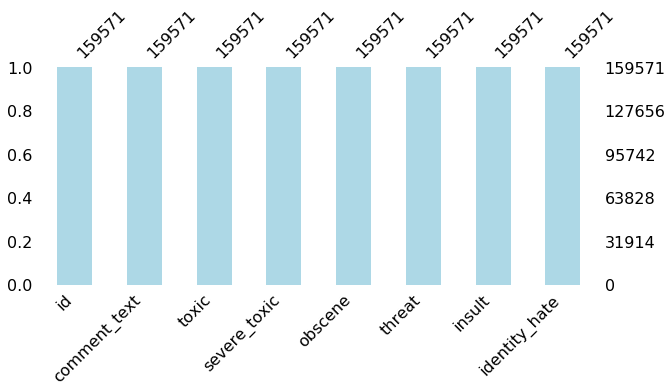

In [97]:
msno.bar(train, color='lightblue', figsize=(10,4))

All columns have data in 100% of observations.

Let's explore comment_text column which consists of Wikipedia posts.

In [26]:
lens = train.comment_text.str.len()
print(f'Mean of the comments length: {lens.mean()}')
print(f'Standard deviation of the comments length: {lens.std()}')
print(f'Max of the comments length: {lens.max()}')
print(f'Min of the comments length: {lens.min()}')

Mean of the comments length: 394.0732213246768
Standard deviation of the comments length: 590.7202819048923
Max of the comments length: 5000
Min of the comments length: 6


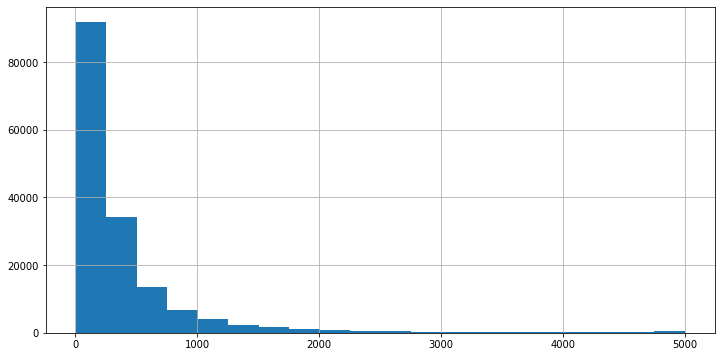

In [80]:
lens.hist(figsize = (12,6), bins = 20)

We clearly see that the distribution of lengths is right skewed, so we are dealing mostly with short comments.

## Text Mining Analysis

# Preprocessing

We need to create another column for binary values that mean that no category was identified.

In [0]:
label_cols = train.iloc[:,2:].columns
train['other'] = 1-train[label_cols].max(axis=1)